In [1]:
from tree_detection_framework.detection.detector import (
    Detector,
    DeepForestDetector,
    Detectree2Detector,
)
from tree_detection_framework.detection.models import DeepForestModule, Detectree2Module
from tree_detection_framework.postprocessing.postprocessing import (
    single_region_NMS,
    multi_region_NMS,
)
from tree_detection_framework.preprocessing.preprocessing import (
    create_image_dataloader,
)
import torch

/home/aspallav/anaconda3/envs/tree-detection-framework/lib/python3.10/site-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)


In [7]:
dataloader = create_image_dataloader(
    "/home/aspallav/Documents/photogrammetry_data/raw_drone_images/101MEDIA-selected",
    chip_size=2200,
    chip_stride=2000,
    batch_size=4,
)

2025-01-07 17:07:08,042 - INFO - Units set in PIXELS


In [8]:
# Setup the parameters dictionary use DeepForest
DEEPFOREST_MODEL_PARAMS = {
    "backbone": "retinanet",
    "num_classes": 1,
}

# The device to use for inference, GPU or CPU
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# This model uses pretrained weights from DeepForest
module = DeepForestModule(DEEPFOREST_MODEL_PARAMS).to(DEVICE)
detector = DeepForestDetector(module)

region_detection_sets, filenames = detector.predict_raw_drone_images(dataloader)

/home/aspallav/Documents/code/tree-detection-framework/tree_detection_framework/detection/models.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_d

Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


Performing prediction on batches: 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


In [9]:
region_detection_sets

In [10]:
filenames

['/home/aspallav/Documents/photogrammetry_data/raw_drone_images/101MEDIA-selected/DJI_0859.JPG',
 '/home/aspallav/Documents/photogrammetry_data/raw_drone_images/101MEDIA-selected/DJI_0895.JPG',
 '/home/aspallav/Documents/photogrammetry_data/raw_drone_images/101MEDIA-selected/DJI_0991.JPG']

/home/aspallav/anaconda3/envs/tree-detection-framework/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


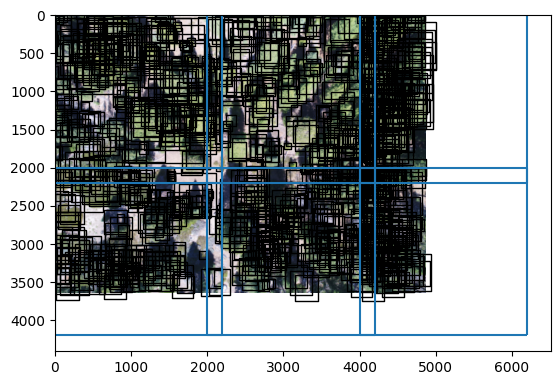

/home/aspallav/anaconda3/envs/tree-detection-framework/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


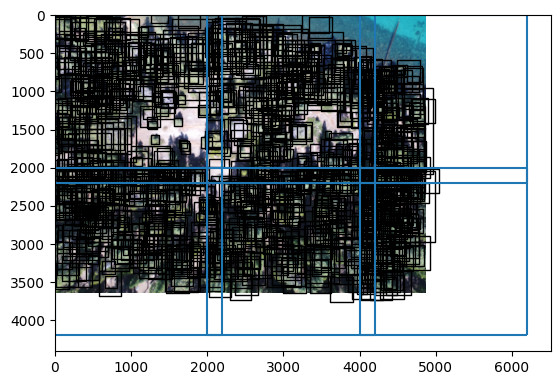

/home/aspallav/anaconda3/envs/tree-detection-framework/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


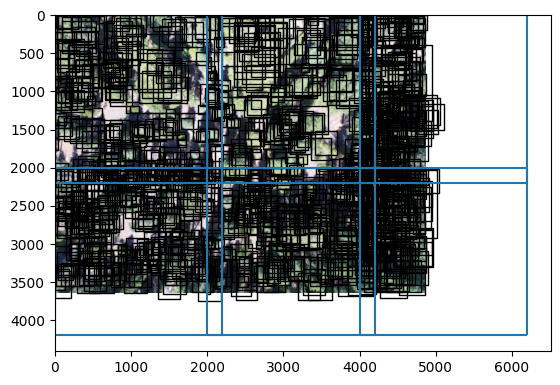

In [14]:
for rds, img in zip(region_detection_sets, filenames):
    rds.plot(raster_file=img)

/home/aspallav/anaconda3/envs/tree-detection-framework/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
2025-01-07 17:10:42,434 - INFO - Bound have overlap, running across-region NMS


/home/aspallav/anaconda3/envs/tree-detection-framework/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/home/aspallav/anaconda3/envs/tree-detection-framework/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


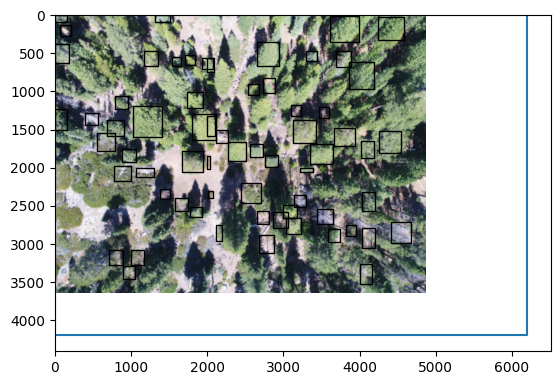

/home/aspallav/anaconda3/envs/tree-detection-framework/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
2025-01-07 17:10:42,711 - INFO - Bound have overlap, running across-region NMS
/home/aspallav/anaconda3/envs/tree-detection-framework/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/home/aspallav/anaconda3/envs/tree-detection-framework/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


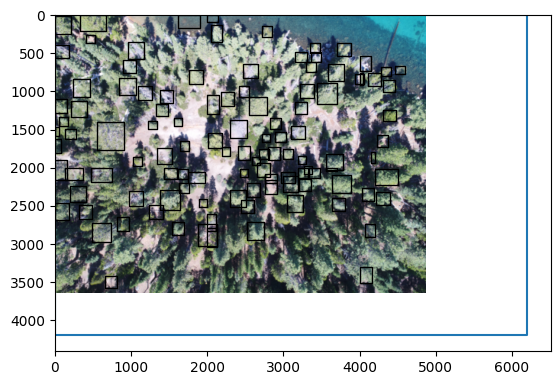

/home/aspallav/anaconda3/envs/tree-detection-framework/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
2025-01-07 17:10:42,993 - INFO - Bound have overlap, running across-region NMS
/home/aspallav/anaconda3/envs/tree-detection-framework/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/home/aspallav/anaconda3/envs/tree-detection-framework/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


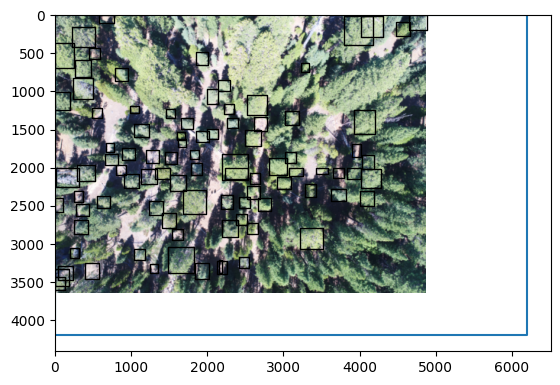

In [15]:
for rds, img in zip(region_detection_sets, filenames):
    nms_rds = multi_region_NMS(rds, threshold=0.4)
    nms_rds.plot(raster_file=img)